In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", dataset_path)

path_join = os.path.join(dataset_path, 'WELFake_Dataset.csv')
df = pd.read_csv(path_join)

print(df.head())

/Users/jacksonglass/Library/r-miniconda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/jacksonglass/.cache/kagglehub/datasets/saurabhshahane/fake-news-classification/versions/77
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [2]:
# Print first few rows
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [17]:
# Drop Nan
df = df.dropna()

# Drop extremely long texts
df = df[df['text'].str.len() <= 32500]

In [4]:
# Preprocessing function
def preprocess_text(text):
    # Basic text preprocessing: lowercasing and removing non-alphanumeric characters
    text = text.lower()
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return text

# Text analysis of individual headlines
def count_words(text):
    return len(text.split())

def count_unique_words(text):
    return len(set(text.split()))

def count_characters(text):
    return len(text) 

In [18]:
# Preprocess (remove punctuation, normalize case)
df['title'] =df['title'].apply(preprocess_text)
df['text'] = df['text'].apply(preprocess_text)

# Add columns with text analysis
df['title_word_count'] = df['title'].apply(count_words)
df['text_word_count'] = df['text'].apply(count_words)

In [ ]:
import scipy.stats as stats

13.334806235591174 4.763248153222613
10.781551039076122 2.5747451505911836


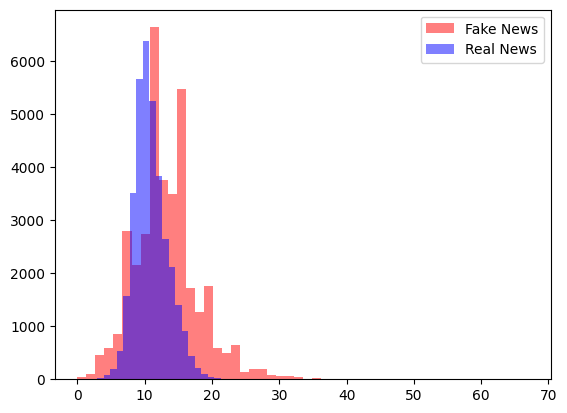

In [23]:
plt.hist(df[df['label']==1]['title_word_count'], alpha=0.5, color='red', label='Fake News', bins=50)
plt.hist(df[df['label']==0]['title_word_count'], alpha=0.5, color='blue', label='Real News', bins=28)

mu_fake_title, sigma_fake_title = df[df['label']==1]['title_word_count'].mean(), df[df['label']==1]['title_word_count'].std()
mu_real_title, sigma_real_title = df[df['label']==0]['title_word_count'].mean(), df[df['label']==0]['title_word_count'].std()

print(mu_fake_title, sigma_fake_title)
print(mu_real_title, sigma_real_title)

plt.legend()

492.67205511033046
564.1262041563045


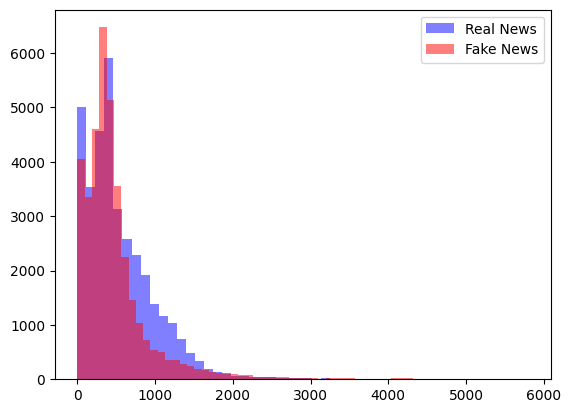

In [25]:
plt.hist(df[df['label']==0]['text_word_count'], alpha=0.5, color='blue', label='Real News', bins=50)
plt.hist(df[df['label']==1]['text_word_count'], alpha=0.5, color='red', label='Fake News', bins=60)

mu_fake_text = df[df['label']==1]['text_word_count'].mean()
mu_real_text = df[df['label']==0]['text_word_count'].mean()

print(mu_fake_text)
print(mu_real_text)

plt.legend()